In [1]:
print("Hai there")

Hai there


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
dataset_path = "./emp_data.csv"

In [5]:
# Loading the given dataset.
df = pd.read_csv(dataset_path)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Basic Info

In [89]:
df.shape

(48842, 15)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [91]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [92]:
# Verifying if any null values are present in the dataset.
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


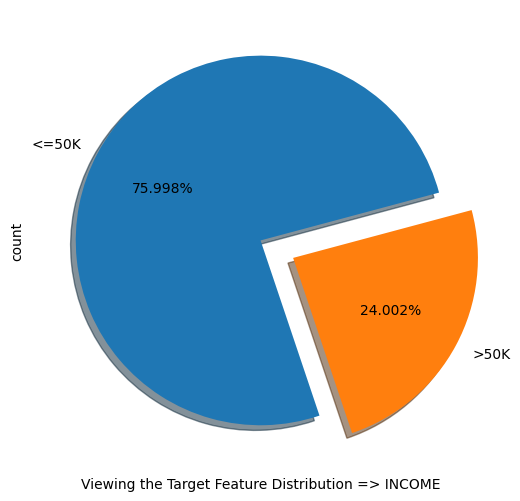

In [365]:
# Viewing the INCOME Distribution.
plt.figure(figsize=(6,6))
df['income'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.3f%%', shadow=True,startangle=15)
plt.xlabel("Viewing the Target Feature Distribution => INCOME")
plt.show()

### Initial Analysis

In [93]:
# Checking all the unique values in all the columns.
for column in df.columns:
    print(f"\nUnique values in column: {column}")
    print(df[column].unique())



Unique values in column: age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

Unique values in column: workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in column: fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

Unique values in column: education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Unique values in column: educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

Unique values in column: marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in column: occupation
['Machine-op-i

### Globally Used Functions

In [125]:
def plot_column_countplot(data, column_name, figsize=(5, 3)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=column_name, )
    plt.xticks(rotation=45)
    plt.title(f"Countplot of \'{column_name}\'")
    plt.show()

In [333]:
def plot_column_boxplot(data, column_name, figsize=(5, 3)):
    plt.figure(figsize=figsize)
    plt.title(f"Boxplot of \'{column_name}\'")
    sns.boxplot(data=data, x=column_name)

### Columns - Preprocessing

#### Initial Info

In [126]:
# Data printing to decide columns to DROP.

for col in df.columns:
    print(f"In \'{col}\' column :")
    print(df[col].value_counts(dropna=False))
    print("--------")

In 'age' column :
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
--------
In 'workclass' column :
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
--------
In 'fnlwgt' column :
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64
--------
In 'education' column :
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th      

In [127]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [128]:
print("Categorical Cols: ", [col for col in df.columns if df[col].dtype=='object'] )
print("Numerical Cols: ", [col for col in df.columns if df[col].dtype!='object'] )

Categorical Cols:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical Cols:  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Dropable Columns: [`fnlwgt`, `education`]

Categorical Columns: [`workclass`, `marital-status`, `occupation`, `relationship`, `race`, `gender`, `native-country`]

Numerical Columns: [`age`, `educational-num`, `capital-gain`, `capital-loss`, `hours-per-week`]

Target Column: `income`

#### Removing Uneccessary Columns

In [129]:
df.shape

(48842, 15)

In [130]:
dropable_columns = ['fnlwgt', 'education']

In [131]:
df.drop(columns=dropable_columns, inplace=True)

In [132]:
df.shape

(48842, 13)

#### Categorical Columns Handling

In [155]:
# Data printing to decide columns to DROP.

for col in df.columns:
    if(df[col].dtype != 'object'): continue
    print(f"In \'{col}\' column :")
    print(df[col].value_counts(dropna=False))
    print("--------")

In 'workclass' column :
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64
--------
In 'marital-status' column :
marital-status
Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
Name: count, dtype: int64
--------
In 'occupation' column :
occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
?                    2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
-

##### Handling `workclass` Column

In [133]:
this_column = 'workclass'

In [134]:
print(df[this_column].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [135]:
droppable_categories = ['Without-pay', 'Never-worked']

In [136]:
df = df[~df[this_column].isin(droppable_categories)]

In [137]:
df.shape

(48811, 13)

In [138]:
na_new_value = "Others"

In [139]:
# Replacing all '?' with 'Others'. (2799 in total)
df[this_column].replace("?", na_new_value, inplace=True)

/tmp/ipython-input-139-3229834195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[this_column].replace("?", na_new_value, inplace=True)
/tmp/ipython-input-139-3229834195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[this_column].replace("?", na_new_value, inplace=True)


In [140]:
print(df[this_column].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


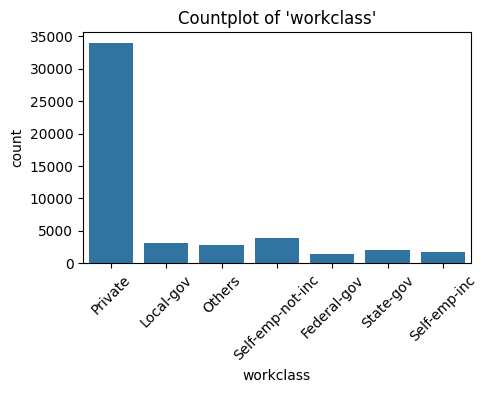

In [141]:
plot_column_countplot(df, this_column)

##### Handling `marital-status` Column

In [142]:
this_column = 'marital-status'

In [143]:
print(df[this_column].value_counts())

marital-status
Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
Name: count, dtype: int64


In [ ]:
# No NA values to handle.
# No categories to drop.

In [163]:
# # Replacing 'Never-Married' -> 'Single'
# to_replace = "Never-married"
# replace_with = "Single"

In [161]:
# this_column = 'marital-status'
# df[this_column] = df[this_column].replace(to_replace, replace_with)

In [167]:
# combining_categories = ["Widowed", "Separated", "Divorced"]
# group_name = "Previously Married"

In [175]:
# combining_categories = ["Married-spouse-absent", "Married-AF-spouse"]
# group_name = "Married"

In [168]:
# this_column = 'marital-status'
# df[this_column] = df[this_column].replace(combining_categories, group_name)

In [182]:
combining_categories_dict = {
    "Single": ["Never-married"],
    "Married": ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"],
    "Previously Married": ["Widowed", "Separated", "Divorced"],
}

In [183]:
this_colum = 'marital-status'
for group_name, combining_categories in combining_categories_dict.items():
    df[this_column] = df[this_column].replace(combining_categories, group_name)

In [174]:
df.shape

(48811, 13)

In [184]:
print(df[this_column].value_counts())

marital-status
Married               23028
Single                16104
Previously Married     9679
Name: count, dtype: int64


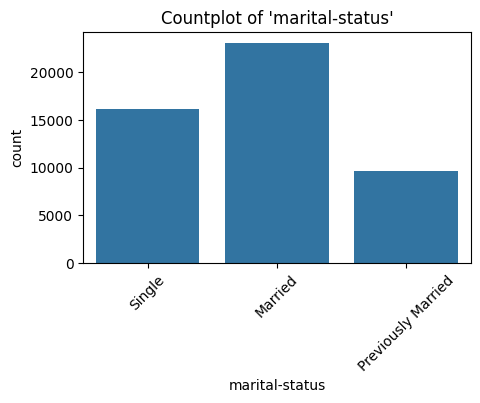

In [185]:
plot_column_countplot(df, this_column)

##### Handling `occupation` Column

In [240]:
this_column = 'occupation'

In [244]:
print(df[this_column].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
?                    2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [245]:
occupation_group_dict = {
    'White-Collar': ['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'],
    'Blue-Collar': ['Craft-repair','Transport-moving','Handlers-cleaners','Machine-op-inspct'],
    'Service': ['Other-service','Protective-serv','Priv-house-serv'],
    'Agriculture': ['Farming-fishing'],
    'Other': ['Armed-Forces'],
    'Unknown': ['?']
}

In [246]:
this_column = 'occupation'
for job_group, jobs in occupation_group_dict.items():
    df[this_column] = df[this_column].replace(jobs, job_group)

In [248]:
print(df[this_column].value_counts())

occupation
White-Collar    24814
Blue-Collar     13555
Service          6146
Unknown          2799
Agriculture      1482
Other              15
Name: count, dtype: int64


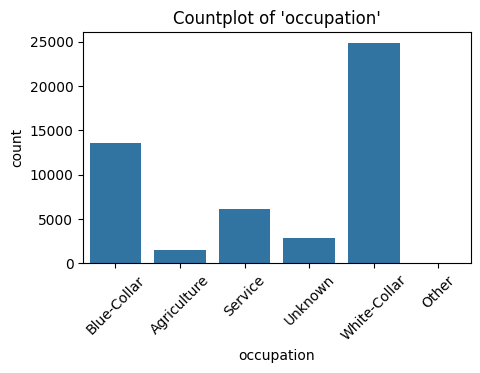

In [249]:
plot_column_countplot(df, 'occupation')

##### Handling `relationship` Column

In [191]:
this_column = 'relationship'

In [193]:
print(df[this_column].value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [ ]:
# No NA values to replace.
# No values to drop.

In [199]:
combining_categories_dict = {
    "Spouse": ["Husband", "Wife"],
}

In [200]:
this_column = 'relationship'
for group_name, combining_categories in combining_categories_dict.items():
    df[this_column] = df[this_column].replace(combining_categories, group_name)

In [201]:
print(df[this_column].value_counts())

relationship
Spouse            22035
Not-in-family     12582
Own-child          7566
Unmarried          5123
Other-relative     1505
Name: count, dtype: int64


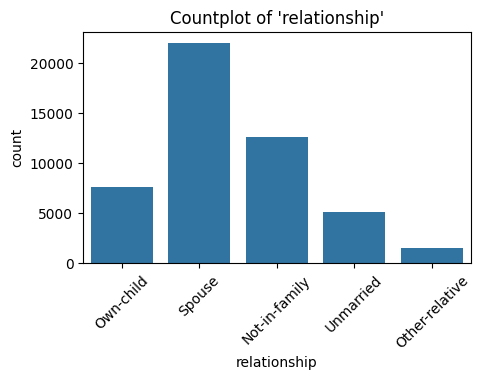

In [203]:
plot_column_countplot(df, 'relationship')

##### Handling `race` Column

In [205]:
this_column = 'race'

In [206]:
print(df[this_column].value_counts())

race
White                 41736
Black                  4681
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [ ]:
# No changes done to any values.

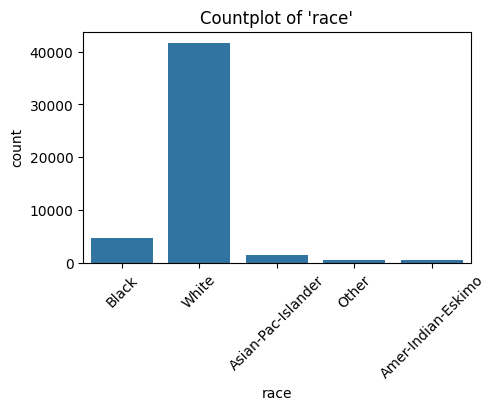

In [207]:
plot_column_countplot(df, 'race')

##### Handling `gender` Column

In [212]:
this_column = 'gender'
print(df[this_column].value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


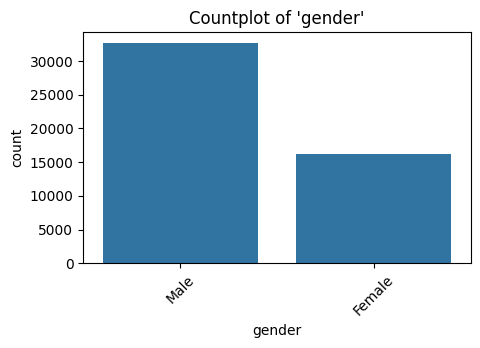

In [213]:
plot_column_countplot(df, 'gender')

##### Handling `native-country` Column

In [214]:
this_column = 'native-country'

In [215]:
print(df[this_column].value_counts())

native-country
United-States                 43802
Mexico                          951
?                               857
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [224]:
df[this_column].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [231]:
# Aiming to group the countries by the region or continents.
region_to_countries_dict = {
    'North America': ['United-States', 'Canada', 'Mexico','Puerto-Rico', 'Outlying-US(Guam-USVI-etc)'],
    'Central America': ['Guatemala', 'El-Salvador', 'Nicaragua', 'Honduras'],
    'South America': ['Peru', 'Columbia', 'Ecuador'],
    'Caribbean': ['Dominican-Republic', 'Cuba', 'Haiti','Jamaica', 'Trinadad&Tobago'],
    'Europe': ['Ireland', 'England', 'Germany', 'France', 'Portugal','Scotland', 'Greece', 'Italy', 'Holand-Netherlands','Poland', 'Hungary', 'Yugoslavia'],
    'Asia (East)': ['Philippines', 'Thailand', 'Vietnam', 'Cambodia','Japan', 'China', 'Taiwan', 'Hong', 'Laos'],
    'Asia (South)': ['India'],
    'Asia (West)': ['Iran'],
    'Other': ['South'],
    'Unknown': ['?']
}


In [232]:
this_column = 'native-country'
for region, countries in region_to_countries_dict.items():
    df[this_column] = df[this_column].replace(countries, region)

In [233]:
print(df[this_column].value_counts())

native-country
North America      45142
Unknown              857
Europe               780
Asia (East)          770
Caribbean            449
Central America      312
South America        176
Asia (South)         151
Other                115
Asia (West)           59
Name: count, dtype: int64


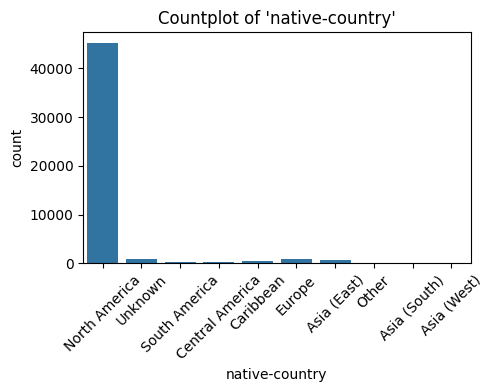

In [234]:
plot_column_countplot(df, 'native-country')

#### Post-Categorical Handling

In [252]:
# for col in df.columns:
#   if df[col].dtype != 'object': continue
#   print(f"In \'{col}\' column :")
#   print(df[col].value_counts(dropna=False))
#   print("--------")

In [366]:
# saving the current df
# df.to_csv("./Categorial_Done_DF.csv", index=False)

#### Numerical Column Handling

##### Initial Numerical Overview

In [271]:
numerical_cols = [col for col in df.columns if df[col].dtype!='object']
print(numerical_cols)


['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [272]:
print(df[numerical_cols].describe())

                age  educational-num  capital-gain  capital-loss  \
count  48811.000000     48811.000000  48811.000000  48811.000000   
mean      38.643707        10.079101   1079.613018     87.519227   
std       13.704928         2.570998   7454.320956    403.044378   
min       17.000000         1.000000      0.000000      0.000000   
25%       28.000000         9.000000      0.000000      0.000000   
50%       37.000000        10.000000      0.000000      0.000000   
75%       48.000000        12.000000      0.000000      0.000000   
max       90.000000        16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48811.000000  
mean        40.427527  
std         12.387637  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [273]:
# for col in df.columns:
#     if df[col].dtype == 'object': continue
#     print(f"In \'{col}\' column :")
#     # print(df[col].value_counts(dropna=False))
#     print("--------")

##### Handling `age` Column

In [264]:
this_column = 'age'

In [339]:
temp_df = pd.read_csv(dataset_path)

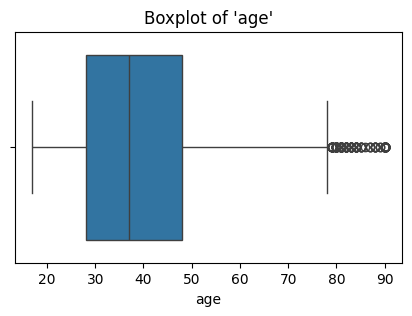

In [341]:
# Outlier Detection.
plot_column_boxplot(df, 'age')

In [317]:
this_column = 'age'
df = df[(df[this_column]>=17) & (df[this_column]<=75)]

In [315]:
# df_temp['temp_age'] = pd.cut(df['age'],
#                   bins=[16, 25, 35, 50, 65, 100],
#                   labels=['Teen', 'YoungAdult', 'MidAge', 'Senior', 'Elder'],
#                   right=True, include_lowest=True)

In [318]:
# plot_column_countplot(df_temp, 'temp_age')

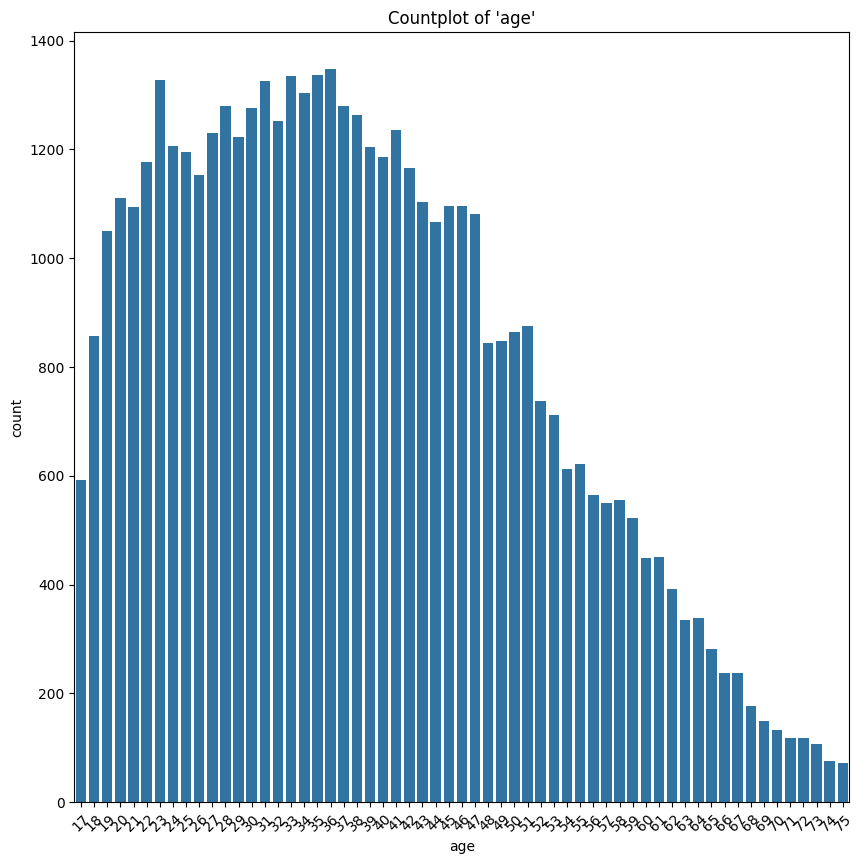

In [344]:
plot_column_countplot(df, 'age', figsize=(10, 10))

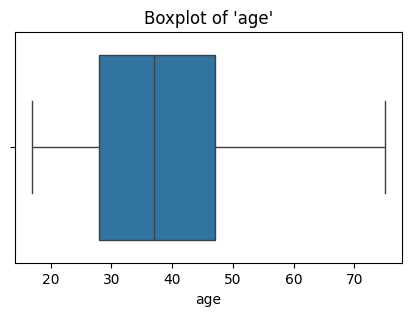

In [343]:
plot_column_boxplot(df, 'age')

/tmp/ipython-input-370-3156987075.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


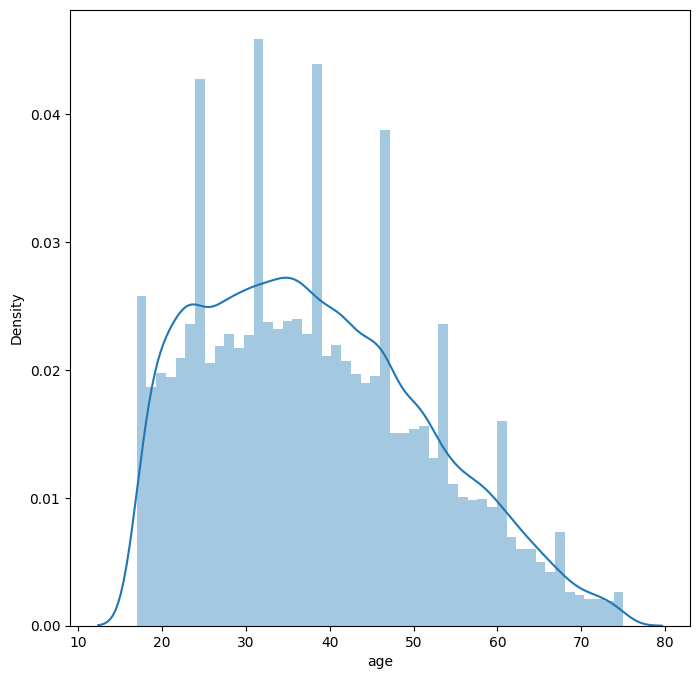

In [370]:
# Additional Visualization.
plt.figure(figsize=(8,8))
sns.distplot(df['age'])
plt.show()

##### Handling `educational-num` Column

In [345]:
this_column = 'educational-num'

In [348]:
print(df[this_column].value_counts())

educational-num
9     15655
10    10824
13     7983
14     2634
11     2053
7      1801
12     1592
6      1373
4       899
15      819
5       745
8       654
16      587
3       498
2       239
1        82
Name: count, dtype: int64


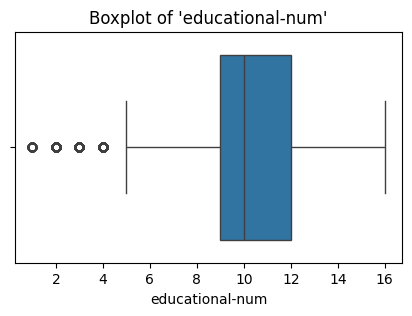

In [346]:
plot_column_boxplot(df, 'educational-num')

##### Handling `capital-gain` column

In [ ]:
this_column = 'capital-gain'

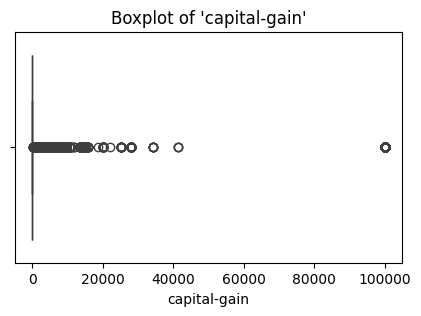

In [371]:
plot_column_boxplot(df, 'capital-gain')

In [376]:
# Add a Binary indicator & Applying log-transform if non-zero value exisits.

In [380]:
df['has-capital-gain'] = (df['capital-gain'] > 0).astype(int)

In [375]:
# Replacing 0 with NaN to avoid log(0) issue
df['capital-gain-log'] = df['capital-gain'].replace(0, np.nan)

# Apply log1p transformation (log(1 + x)) to avoid log(0)
df['capital-gain-log'] = np.log1p(df['capital-gain-log'])

# Fill NaN back to 0 (for originally 0 gains)
# df['capital-gain-log'].fillna(0, inplace=True)
df['capital-gain-log'] = df['capital-gain-log'].fillna(0)


In [384]:
df.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'capital-gain-log',
       'has-capital-gain'],
      dtype='object')

In [385]:
len(df.columns)

15

##### Handling `capital-loss` column

In [ ]:
this_column = 'capital-loss'

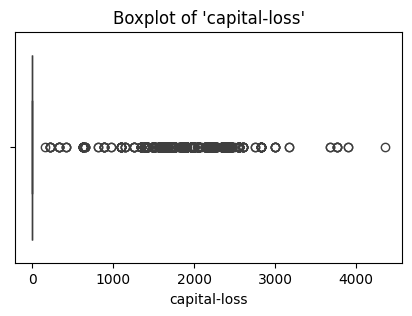

In [379]:
plot_column_boxplot(df, 'capital-loss')

In [ ]:
# Add a Binary indicator & Applying log-transform if non-zero value exisits.

In [386]:
df['has-capital-loss'] = (df['capital-loss'] > 0).astype(int)

In [387]:
# Replacing 0 with NaN to avoid log(0) issue
df['capital-loss-log'] = df['capital-loss'].replace(0, np.nan)

# Apply log1p transformation (log(1 + x)) to avoid log(0)
df['capital-loss-log'] = np.log1p(df['capital-loss-log'])

# Fill NaN back to 0 (for originally 0 losss)
# df['capital-loss-log'].fillna(0, inplace=True)
df['capital-loss-log'] = df['capital-loss-log'].fillna(0)


In [388]:
df.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'capital-gain-log',
       'has-capital-gain', 'has-capital-loss', 'capital-loss-log'],
      dtype='object')

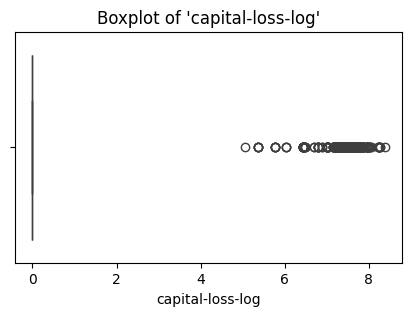

In [390]:
plot_column_boxplot(df, 'capital-loss-log')

##### Handling `hours-per-week` column

In [367]:
this_column = 'hours-per-week'

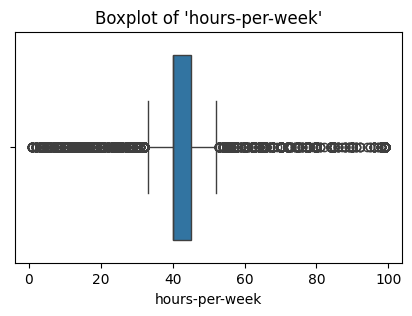

In [368]:
plot_column_boxplot(df, 'hours-per-week')

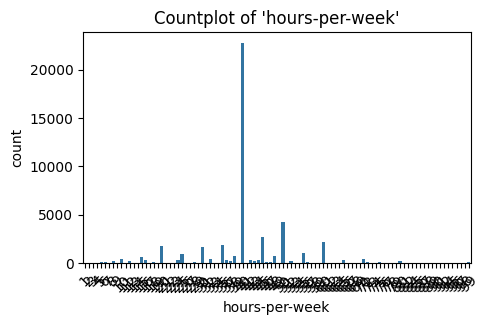

In [391]:
plot_column_countplot(df, 'hours-per-week')

In [402]:
# df['hours-per-week'] = df['hours-per-week'].clip(10, 80)
# temp = df['hours-per-week'].clip(10, 80)

In [401]:
# plt.figure(figsize=(8,8))
# sns.distplot(temp)
# plt.show()

In [404]:
# temp2 = scaler.fit_transform(df[['hours-per-week']])

/tmp/ipython-input-405-949299295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp2)


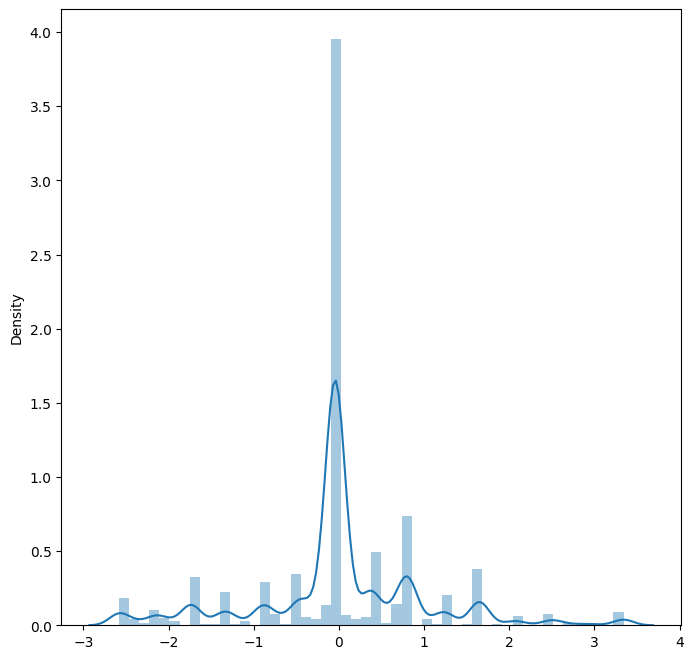

In [405]:
# plt.figure(figsize=(8,8))
# sns.distplot(temp2)
# plt.show()

In [406]:
# Capping the outliers.
df['hours-per-week'] = df['hours-per-week'].clip(10, 80)

In [407]:
# Applying Standard-scaling for Models which are sensitive to the magnitude of this feature.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['hours-per-week-scaled'] = scaler.fit_transform(df[['hours-per-week']])

#### Post Numerical Analysis

In [410]:
numerical_cols = [col for col in df.columns if df[col].dtype!='object']

In [415]:
print(df[numerical_cols].describe())

                age  educational-num  capital-gain  capital-loss  \
count  48438.000000     48438.000000  48438.000000  48438.000000   
mean      38.319377        10.087246   1076.107292     87.423717   
std       13.241398         2.559962   7449.573392    402.280882   
min       17.000000         1.000000      0.000000      0.000000   
25%       28.000000         9.000000      0.000000      0.000000   
50%       37.000000        10.000000      0.000000      0.000000   
75%       47.000000        12.000000      0.000000      0.000000   
max       75.000000        16.000000  99999.000000   4356.000000   

       hours-per-week  capital-gain-log  has-capital-gain  has-capital-loss  \
count    48438.000000      48438.000000      48438.000000      48438.000000   
mean        40.510735          0.724822          0.082146          0.046740   
std         11.813211          2.440366          0.274590          0.211084   
min         10.000000          0.000000          0.000000          0.00

##### Dropping Cols Based on Data

In [416]:
# Based on final description .. dropping 'capital-gain' and 'capital-loss' as they are mostly zeroed and their logarithmic equivalents have been found.

In [418]:
df.shape

(48438, 18)

In [419]:
numerical_cols_to_drop = ['capital-gain', 'capital-loss']

In [420]:
df.drop(columns=numerical_cols_to_drop, inplace=True)

In [421]:
df.shape

(48438, 16)

##### Saving the Numerically-Analysed Df

In [423]:
# df.head()

In [424]:
# saving the current df
# df.to_csv("./Categorial_Done_DF.csv", index=False)